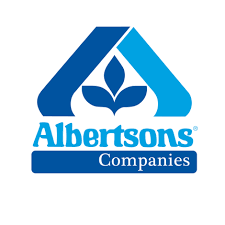

# Machine Learning - Personalization for business in reatil industry

### Introduction
This case study is about identifying the customers dietary preferences based on customer's shopping history

### Objective - Identifying the Customer's Dietary Prefernce

### Business Problem

Identifying customer's dietary preferences is crucial in the retail industry, particularly in food and beverages, for several reasons 

1. **Presonalization:** Understanding dietary preferences allows reatilers to provide personalized recommendations and offers to customers. This enhances the shopping experience and the likelihood of making a sale
2. **Customer Satisfaction:** Catering to dieatry preferences ensures that customers can find products that align with their needs and values.Satisfied customers are more likely to return and become loyal shoppers.
3. **Market Segmentation:** By identifying the different dietary segments(e.g. vegetarian, vegan, paleo, gluten-free) retailers can tailor their product offerings and marketing startegies to target specific customer groups effectivel.
4. **Marketing Efficiency:** Retailers can create targeted marketing campaigns that resonate with specific dietary segment, leading to higher return on marketing investment.
5. **Data-Driven Decision Making:** Gathering data on dietary preferences enables reatilers to make data-driven decisions aboutproduct offerings, inventory management, and marketing strategies, leading to more informed choices.


* A vegetarian diet is one that does not include any meat or seafood

* A vegan diet is one that is free of meat, dairy products, and eggs.

* A paleo diet includes fruits, vegetables, lean meats, fish, eggs, nuts and seeds. These are foods that in the past people could get by hunting and gathering. 

* A pescatarian diet is largely a plant-based diet of whole grains, nuts, legumes, produce and healthy fats, but also includes fish and other seafood.

* The keto diet is a high-fat, adequate-protein, low-carbohydrate diet.

* A low carb diet is a diet that restricts dietary carbohydrates, mainly from grains, sugar-sweetened beverages, and bread.



# Importing the necessay libraries

In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -r ./../requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Reading the features csv file

In [2]:
df = pd.read_csv("features.csv")

### Shape attribute in Pandas enables us to obtain the shape of a DataFrame

In [3]:
df.shape

(5924, 20)

### Pandas head function returns the first 10 rows for the object based on position. 

In [4]:
df.head(10)

,customer_id,dp,num_txn,basket_pct_MILK_FREE,basket_pct_EGG_FREE,basket_pct_GLUTEN_FREE,basket_pct_VEGETARIAN,basket_pct_VEGAN,basket_pct_KETO,basket_pct_PALEO,basket_pct_SHELLFISH_FREE,basket_pct_SOY_FREE,basket_pct_LACTOSE_FREE,basket_pct_PEANUT_FREE,basket_pct_PESCATARIAN,basket_pct_TREE_NUT_FREE,basket_pct_LOW_CARB,basket_pct_WHEAT_FREE,basket_pct_NO_DIET_PREFERENCES,basket_pct_NO_DIET_RESTRICTIONS
0,111,keto,9,0.043771,0.087542,0.033670,0.296296,0.037037,0.286195,0.000000,0.106061,0.284512,0.000000,0.333333,0.296296,0.228956,0.313131,0.040404,1,1
1,222,vegetarian,24,0.118343,0.224601,0.025823,0.450508,0.308815,0.103641,0.230255,0.143929,0.193511,0.000000,0.262140,0.450508,0.241141,0.119310,0.135290,1,1
2,333,keto,63,0.133589,0.303307,0.057234,0.371892,0.142995,0.241675,0.044765,0.183701,0.269478,0.000000,0.377057,0.367077,0.394499,0.238395,0.203308,1,1
3,444,pescatarian,9,0.106437,0.326848,0.066915,0.343314,0.085217,0.045727,0.038905,0.106037,0.266338,0.142809,0.309155,0.346200,0.305259,0.088344,0.254618,1,1
4,555,vegan,24,0.045506,0.188731,0.018694,0.434062,0.046290,0.070635,0.003086,0.124944,0.095224,0.071361,0.243143,0.434062,0.187986,0.077505,0.158930,1,1
5,666,vegan,13,0.222685,0.232712,0.112197,0.267373,0.205895,0.131481,0.013378,0.170930,0.168603,0.000000,0.270176,0.284467,0.239407,0.131481,0.165799,1,1
6,777,vegetarian,24,0.193648,0.324214,0.246207,0.541125,0.245329,0.222342,0.053976,0.192492,0.411512,0.012289,0.470345,0.533172,0.436634,0.238511,0.306542,1,1
7,888,keto,28,0.036706,0.185937,0.038691,0.379710,0.073810,0.234783,0.023810,0.066468,0.308708,0.000000,0.289630,0.379710,0.267408,0.234783,0.168080,1,1
8,999,vegan,55,0.153198,0.214942,0.091251,0.284736,0.153057,0.129969,0.065448,0.207475,0.229470,0.013535,0.311901,0.295848,0.282892,0.137052,0.230764,1,1
9,1110,vegetarian,29,0.129263,0.322723,0.107539,0.473030,0.135389,0.181153,0.022205,0.209537,0.360695,0.004057,0.429902,0.446649,0.405791,0.207860,0.298986,1,1


### Pandas column is part of a two-dimensional data structure in which one of the attributes is a column

In [5]:
df.columns.values

array(['customer_id', 'dp', 'num_txn', 'basket_pct_MILK_FREE',
       'basket_pct_EGG_FREE', 'basket_pct_GLUTEN_FREE',
       'basket_pct_VEGETARIAN', 'basket_pct_VEGAN', 'basket_pct_KETO',
       'basket_pct_PALEO', 'basket_pct_SHELLFISH_FREE',
       'basket_pct_SOY_FREE', 'basket_pct_LACTOSE_FREE',
       'basket_pct_PEANUT_FREE', 'basket_pct_PESCATARIAN',
       'basket_pct_TREE_NUT_FREE', 'basket_pct_LOW_CARB',
       'basket_pct_WHEAT_FREE', 'basket_pct_NO_DIET_PREFERENCES',
       'basket_pct_NO_DIET_RESTRICTIONS'], dtype=object)

### Columns Description 
*  **customer_id:** unique customer identifier
*  **dp:** Dietary preference
*  **num_txn:** Number of transactions done by the household 
*  **basket_pct_MILK_FREE:** Percentage of milk free transactions
*  **basket_pct_EGG_FREE:** Percentage of egg free transactions
*  **basket_pct_GLUTEN_FREE:** Percentage of gluten free transactions
*  **basket_pct_VEGETARIAN:** Percentage of vegetarian transactions
*  **basket_pct_VEGAN:** Percentage of vegan transactions
*  **basket_pct_KETO:** Percentage of keto transactions
*  **basket_pct_PALEO:** Percentage of paleo transactions
*  **basket_pct_SHELLFISH_FREE:** Percentage of shellfish free transactions
*  **basket_pct_SOY_FREE:** Percentage of soy free transactions
*  **basket_pct_LACTOSE_FREE:** Percentage of lactose free transactions
*  **basket_pct_PEANUT_FREE:** Percentage of peanut free transactions
*  **basket_pct_PESCATARIAN:** Percentage of pescatarian transactions
*  **basket_pct_TREE_NUT_FREE:** Percentage of tree nut free transactions
*  **basket_pct_LOW_CARB:** Percentage of low carb transactions
*  **basket_pct_WHEAT_FREE:** Percentage of wheat free transactions
*  **basket_pct_NO_DIET_PREFERENCES:** Percentage of No Dieatry Preferences Transactions
*  **basket_pct_NO_DIET_RESTRICTIONS:** Percentage of No Dietary Restrictions transactions




### The Pandas describe() method returns description of the data in the DataFrame.

    If the DataFrame contains numerical data, the description contains these information for each column:

    count - The number of not-empty values.
    mean - The average (mean) value.
    std - The standard deviation.
    min - the minimum value.
    25% - The 25% percentile*.
    50% - The 50% percentile*.
    75% - The 75% percentile*.
    max - the maximum value.

    *Percentile meaning: how many of the values are less than the given percentile. Read more about percentiles in our Machine Learning Percentile chapter.

In [33]:
df.describe(include = 'all')

,customer_id,dp,num_txn,basket_pct_MILK_FREE,basket_pct_EGG_FREE,basket_pct_GLUTEN_FREE,basket_pct_VEGETARIAN,basket_pct_VEGAN,basket_pct_KETO,basket_pct_PALEO,basket_pct_SHELLFISH_FREE,basket_pct_SOY_FREE,basket_pct_PEANUT_FREE,basket_pct_PESCATARIAN,basket_pct_TREE_NUT_FREE,basket_pct_LOW_CARB,basket_pct_WHEAT_FREE,basket_pct_NO_DIET_PREFERENCES,basket_pct_NO_DIET_RESTRICTIONS
count,5924.000000,5924,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.0,5924.0
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,vegetarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,328846.998818,NaN,33.049966,0.203790,0.345114,0.133729,0.419427,0.195943,0.156468,0.055134,0.233046,0.292547,0.402699,0.425444,0.365493,0.183475,0.277341,1.0,1.0
std,189855.067766,NaN,28.322267,0.088541,0.121906,0.075294,0.141030,0.092166,0.084812,0.044826,0.100525,0.104979,0.134197,0.141359,0.127163,0.091807,0.101973,0.0,0.0
min,111.000000,NaN,5.000000,0.001468,0.002935,0.002252,0.002935,0.001468,0.001468,0.000581,0.002857,0.001957,0.002935,0.002935,0.002935,0.001468,0.001468,1.0,1.0
25%,164474.250000,NaN,15.000000,0.144896,0.266956,0.082565,0.330209,0.134096,0.095754,0.024772,0.164529,0.226703,0.319431,0.335309,0.285736,0.117309,0.211740,1.0,1.0
50%,328837.500000,NaN,25.000000,0.197437,0.347263,0.125297,0.428418,0.186451,0.147308,0.046495,0.228694,0.293093,0.412591,0.433699,0.372177,0.174997,0.273734,1.0,1.0
75%,493200.750000,NaN,41.000000,0.253935,0.424821,0.171388,0.517683,0.245508,0.206446,0.071011,0.295678,0.357619,0.490065,0.523814,0.449829,0.238061,0.338950,1.0,1.0


# Check if any columns have null values

In [7]:
df.isna().any()

customer_id                        False
dp                                 False
num_txn                            False
basket_pct_MILK_FREE                True
basket_pct_EGG_FREE                False
basket_pct_GLUTEN_FREE              True
basket_pct_VEGETARIAN               True
basket_pct_VEGAN                    True
basket_pct_KETO                    False
basket_pct_PALEO                    True
basket_pct_SHELLFISH_FREE           True
basket_pct_SOY_FREE                False
basket_pct_LACTOSE_FREE            False
basket_pct_PEANUT_FREE              True
basket_pct_PESCATARIAN             False
basket_pct_TREE_NUT_FREE            True
basket_pct_LOW_CARB                False
basket_pct_WHEAT_FREE              False
basket_pct_NO_DIET_PREFERENCES     False
basket_pct_NO_DIET_RESTRICTIONS    False
dtype: bool

In [8]:
# Count if the total number of records which have null columns

In [9]:
df.isna().sum()

customer_id                        0
dp                                 0
num_txn                            0
basket_pct_MILK_FREE               1
basket_pct_EGG_FREE                0
basket_pct_GLUTEN_FREE             2
basket_pct_VEGETARIAN              1
basket_pct_VEGAN                   1
basket_pct_KETO                    0
basket_pct_PALEO                   1
basket_pct_SHELLFISH_FREE          1
basket_pct_SOY_FREE                0
basket_pct_LACTOSE_FREE            0
basket_pct_PEANUT_FREE             1
basket_pct_PESCATARIAN             0
basket_pct_TREE_NUT_FREE           1
basket_pct_LOW_CARB                0
basket_pct_WHEAT_FREE              0
basket_pct_NO_DIET_PREFERENCES     0
basket_pct_NO_DIET_RESTRICTIONS    0
dtype: int64

In [10]:
df['basket_pct_MILK_FREE'].fillna(int(df['basket_pct_MILK_FREE'].mean()), inplace=True)
df['basket_pct_GLUTEN_FREE'].fillna(int(df['basket_pct_GLUTEN_FREE'].mean()), inplace=True)
df['basket_pct_VEGETARIAN'].fillna(int(df['basket_pct_VEGETARIAN'].mean()), inplace=True)
df['basket_pct_VEGAN'].fillna(int(df['basket_pct_VEGAN'].mean()), inplace=True)
df['basket_pct_PALEO'].fillna(int(df['basket_pct_PALEO'].mean()), inplace=True)
df['basket_pct_SHELLFISH_FREE'].fillna(int(df['basket_pct_SHELLFISH_FREE'].mean()), inplace=True)
df['basket_pct_PEANUT_FREE'].fillna(int(df['basket_pct_PEANUT_FREE'].mean()), inplace=True)
df['basket_pct_TREE_NUT_FREE'].fillna(int(df['basket_pct_TREE_NUT_FREE'].mean()), inplace=True)

In [34]:
df.isna().sum()

customer_id                        0
dp                                 0
num_txn                            0
basket_pct_MILK_FREE               0
basket_pct_EGG_FREE                0
basket_pct_GLUTEN_FREE             0
basket_pct_VEGETARIAN              0
basket_pct_VEGAN                   0
basket_pct_KETO                    0
basket_pct_PALEO                   0
basket_pct_SHELLFISH_FREE          0
basket_pct_SOY_FREE                0
basket_pct_PEANUT_FREE             0
basket_pct_PESCATARIAN             0
basket_pct_TREE_NUT_FREE           0
basket_pct_LOW_CARB                0
basket_pct_WHEAT_FREE              0
basket_pct_NO_DIET_PREFERENCES     0
basket_pct_NO_DIET_RESTRICTIONS    0
dtype: int64

In [12]:
(df == 0).sum(axis=0)

customer_id                           0
dp                                    0
num_txn                               0
basket_pct_MILK_FREE                 11
basket_pct_EGG_FREE                   4
basket_pct_GLUTEN_FREE               91
basket_pct_VEGETARIAN                 2
basket_pct_VEGAN                     17
basket_pct_KETO                      44
basket_pct_PALEO                    251
basket_pct_SHELLFISH_FREE            18
basket_pct_SOY_FREE                   4
basket_pct_LACTOSE_FREE            2923
basket_pct_PEANUT_FREE                3
basket_pct_PESCATARIAN                2
basket_pct_TREE_NUT_FREE              6
basket_pct_LOW_CARB                  21
basket_pct_WHEAT_FREE                 5
basket_pct_NO_DIET_PREFERENCES        0
basket_pct_NO_DIET_RESTRICTIONS       0
dtype: int64

In [13]:

df = df.drop('basket_pct_LACTOSE_FREE', axis=1)

In [14]:
df['basket_pct_MILK_FREE']=df.basket_pct_MILK_FREE.mask(df.basket_pct_MILK_FREE == 0,df['basket_pct_MILK_FREE'].mean())
df['basket_pct_EGG_FREE']=df.basket_pct_EGG_FREE.mask(df.basket_pct_EGG_FREE == 0,df['basket_pct_EGG_FREE'].mean())
df['basket_pct_GLUTEN_FREE']=df.basket_pct_GLUTEN_FREE.mask(df.basket_pct_GLUTEN_FREE == 0,df['basket_pct_GLUTEN_FREE'].mean())
df['basket_pct_VEGETARIAN']=df.basket_pct_VEGETARIAN.mask(df.basket_pct_VEGETARIAN == 0,df['basket_pct_VEGETARIAN'].mean())
df['basket_pct_VEGAN']=df.basket_pct_VEGAN.mask(df.basket_pct_VEGAN == 0,df['basket_pct_VEGAN'].mean())
df['basket_pct_KETO']=df.basket_pct_KETO.mask(df.basket_pct_KETO == 0,df['basket_pct_KETO'].mean())
df['basket_pct_PALEO']=df.basket_pct_PALEO.mask(df.basket_pct_PALEO == 0,df['basket_pct_PALEO'].mean())
df['basket_pct_SHELLFISH_FREE']=df.basket_pct_SHELLFISH_FREE.mask(df.basket_pct_SHELLFISH_FREE == 0,df['basket_pct_SHELLFISH_FREE'].mean())
df['basket_pct_SOY_FREE']=df.basket_pct_SOY_FREE.mask(df.basket_pct_SOY_FREE == 0,df['basket_pct_SOY_FREE'].mean())
df['basket_pct_PEANUT_FREE']=df.basket_pct_PEANUT_FREE.mask(df.basket_pct_PEANUT_FREE == 0,df['basket_pct_PEANUT_FREE'].mean())
df['basket_pct_PESCATARIAN']=df.basket_pct_PESCATARIAN.mask(df.basket_pct_PESCATARIAN == 0,df['basket_pct_PESCATARIAN'].mean())
df['basket_pct_TREE_NUT_FREE']=df.basket_pct_TREE_NUT_FREE.mask(df.basket_pct_TREE_NUT_FREE == 0,df['basket_pct_TREE_NUT_FREE'].mean())
df['basket_pct_LOW_CARB']=df.basket_pct_LOW_CARB.mask(df.basket_pct_LOW_CARB == 0,df['basket_pct_LOW_CARB'].mean())
df['basket_pct_WHEAT_FREE']=df.basket_pct_WHEAT_FREE.mask(df.basket_pct_WHEAT_FREE == 0,df['basket_pct_WHEAT_FREE'].mean())

In [15]:
(df == 0).sum(axis=0)

customer_id                        0
dp                                 0
num_txn                            0
basket_pct_MILK_FREE               0
basket_pct_EGG_FREE                0
basket_pct_GLUTEN_FREE             0
basket_pct_VEGETARIAN              0
basket_pct_VEGAN                   0
basket_pct_KETO                    0
basket_pct_PALEO                   0
basket_pct_SHELLFISH_FREE          0
basket_pct_SOY_FREE                0
basket_pct_PEANUT_FREE             0
basket_pct_PESCATARIAN             0
basket_pct_TREE_NUT_FREE           0
basket_pct_LOW_CARB                0
basket_pct_WHEAT_FREE              0
basket_pct_NO_DIET_PREFERENCES     0
basket_pct_NO_DIET_RESTRICTIONS    0
dtype: int64

## Visualize the distribution of data

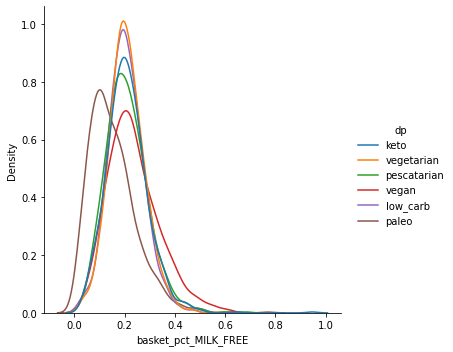

In [18]:
sns.displot(data = df ,kind = 'kde', x = 'basket_pct_MILK_FREE', hue = 'dp' )

## Check if data is balanced

In [21]:
df.groupby(by="dp").agg({"customer_id": 'count'})['customer_id']/len(df)

dp
keto           0.166610
low_carb       0.167117
paleo          0.163572
pescatarian    0.167961
vegan          0.165935
vegetarian     0.168805
Name: customer_id, dtype: float64

### No of unique value counts in the dp (dietary preference) column

In [ ]:
df["dp"].value_counts()

# List of features and model choice

In [23]:
Y_feature = "dp"
X_feature_list = list(set(df.columns) - set([Y_feature, "household_id"]))
model_type = "RF" # RF or LR. two models were trained and compared

### We choose the model_type  : either RandomForestClassifier or Logistic Regression

### Type of Problem - Classification

We can use previous purchase data to identify the customers dietary preference

### Classification 

A classification algorithm is a supervised learning technique that uses data training to determine data into different classes. Classification predictive modeling is trained using data or observations, and new observations are categorized into classes or groups.
1. **Logistic Regression:** Statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables.We will use**Multinomial logistic regression:** In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help indentify a customers dietary preference.

2. **RandomForestClassifier:** A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
-  Random forests are a popular supervised machine learning algorithm. 
    *  Random forests are for supervised machine learning, where there is a labeled target variable.
    *  Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems. 
    *  Random forests are an ensemble method, meaning they combine predictions from other models.
    *  Each of the smaller models in the random forest ensemble is a decision tree.


## Cross-validation
*  Cross-validation is a statistical method used to estimate the skill of machine learning models.

*  It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem 

## K-fold : Cross-Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
* Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores


K-fold output parameters
* k: number folds
* train_L: numbers of records used for training
* train_precision: Precision of the train data
* train_recall: Recall of the train data
* train_fscore: F1 score of the train data 
* test_L: numbers of records used for testing
* test_precision: Precision of the test data
* test_recall: Recall of the test data
* test_fscore: F1 score of the test data

In [24]:
# K-fold
X = df[X_feature_list].to_numpy(); y = df[Y_feature].to_numpy()

strtfdKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
kfolds = strtfdKFold.split(X, y)

In [25]:


table = []
for k, (train_rows, test_rows) in enumerate(kfolds):
  if model_type == "RF":
    X_train = X[train_rows]
    X_test = X[test_rows]
    model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=42).fit(X_train, y[train_rows])    
  elif model_type == "LR":
    scaler = StandardScaler().fit(X[train_rows])
    X_train = scaler.transform(X[train_rows])
    X_test = scaler.transform(X[test_rows])
    model = LogisticRegression(C = 0.8, random_state=42).fit(X_train, y[train_rows])
    
  y_hat = model.predict(X_train)
  y_pred = model.predict(X_test)
  train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y[train_rows], y_hat, pos_label = 1, average='micro')
  test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y[test_rows], y_pred, pos_label = 1, average='micro')
       
  table.append([k, X_train.shape[0], 100. * train_precision, 100. * train_recall, 100. * train_fscore,\
                X_test.shape[0], 100. * test_precision, 100. * test_recall, 100. * test_fscore])


In [27]:
Kfold_performance_df = pd.DataFrame(table, columns = ['k', 'train_L', 'train_precision', 'train_recall', 'train_fscore',\
                                                 'test_L', 'test_precision', 'test_recall', 'test_fscore'])
Kfold_performance_df.round(decimals = 2)

,k,train_L,train_precision,train_recall,train_fscore,test_L,test_precision,test_recall,test_fscore
0,0,5331,52.04,52.04,52.04,593,50.25,50.25,50.25
1,1,5331,51.70,51.70,51.70,593,50.59,50.59,50.59
2,2,5331,51.85,51.85,51.85,593,48.57,48.57,48.57
3,3,5331,51.90,51.90,51.90,593,48.74,48.74,48.74
4,4,5332,52.34,52.34,52.34,592,48.14,48.14,48.14
5,5,5332,52.29,52.29,52.29,592,48.82,48.82,48.82
6,6,5332,51.86,51.86,51.86,592,48.99,48.99,48.99
7,7,5332,52.23,52.23,52.23,592,45.61,45.61,45.61
8,8,5332,52.38,52.38,52.38,592,46.11,46.11,46.11
9,9,5332,52.53,52.53,52.53,592,46.79,46.79,46.79


In [30]:
# K-fold + GridSearchCV
X = df[X_feature_list].to_numpy(); y = df[Y_feature].to_numpy()

strtfdKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
kfolds = strtfdKFold.split(X, y)

In [31]:
best_parameters = None
table = []
for k, (train_rows, test_rows) in enumerate(kfolds):
  if isinstance(best_parameters, dict) == False:
    print("capturing best hyper parameters")
    if model_type == "RF":
      model = RandomForestClassifier(random_state=42)
      parameters = {'n_estimators':[100, 200, 500], 'max_depth':[1, 5, 10], 'min_samples_leaf': [1, 5, 10]}
      X_train = X[train_rows]
      X_test = X[test_rows]
    elif model_type == "LR":
      model = LogisticRegression(random_state=42)
      parameters = {'C':[0.5, 0.75, 1, 1.5, 2.0]}
      scaler = StandardScaler().fit(X[train_rows])
      X_train = scaler.transform(X[train_rows])
      X_test = scaler.transform(X[test_rows])  
    model_GS = GridSearchCV(model, parameters)
    model_GS.fit(X_train, y[train_rows])
    best_parameters = model_GS.best_params_

  if model_type == "RF":
    X_train = X[train_rows]
    X_test = X[test_rows]
    model = RandomForestClassifier(**best_parameters, random_state=42).fit(X_train, y[train_rows])    
  elif model_type == "LR":
    scaler = StandardScaler().fit(X[train_rows])
    X_train = scaler.transform(X[train_rows])
    X_test = scaler.transform(X[test_rows])
    model = LogisticRegression(**best_parameters, random_state=42).fit(X_train, y[train_rows])
    
  y_hat = model.predict(X_train)
  y_pred = model.predict(X_test)
  train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y[train_rows], y_hat, pos_label = 1, average='micro')
  test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y[test_rows], y_pred, pos_label = 1, average='micro')
       
  table.append([k, X_train.shape[0], 100. * train_precision, 100. * train_recall, 100. * train_fscore,\
                X_test.shape[0], 100. * test_precision, 100. * test_recall, 100. * test_fscore])


capturing best hyper parameters


In [29]:
Kfold_performance_df = pd.DataFrame(table, columns = ['k', 'train_L', 'train_precision', 'train_recall', 'train_fscore',\
                                                 'test_L', 'test_precision', 'test_recall', 'test_fscore'])
Kfold_performance_df.round(decimals = 2)

,k,train_L,train_precision,train_recall,train_fscore,test_L,test_precision,test_recall,test_fscore
0,0,5331,70.16,70.16,70.16,593,51.43,51.43,51.43
1,1,5331,70.66,70.66,70.66,593,53.12,53.12,53.12
2,2,5331,70.49,70.49,70.49,593,49.92,49.92,49.92
3,3,5331,70.44,70.44,70.44,593,51.94,51.94,51.94
4,4,5332,70.46,70.46,70.46,592,48.31,48.31,48.31
5,5,5332,70.59,70.59,70.59,592,50.51,50.51,50.51
6,6,5332,71.14,71.14,71.14,592,52.36,52.36,52.36
7,7,5332,70.05,70.05,70.05,592,48.65,48.65,48.65
8,8,5332,70.31,70.31,70.31,592,51.01,51.01,51.01
9,9,5332,70.07,70.07,70.07,592,51.01,51.01,51.01


**F1 score** is a machine learning evaluation metric that measures a model’s accuracy. It combines the precision and recall scores of a model.

<img src="Confusion_Matrix.png" width="65%"/>
<img src="Precision_Recall.png" width="65%"/>
<img src="F1_Score.png" width="65%"/>

**GridSearchCV** is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [ ]:
# K-fold + GridSearchCV
X = df[X_feature_list].to_numpy(); y = df[Y_feature].to_numpy()

strtfdKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
kfolds = strtfdKFold.split(X, y)

best_parameters = None
table = []
for k, (train_rows, test_rows) in enumerate(kfolds):
  if isinstance(best_parameters, dict) == False:
    print("capturing best hyper parameters")
    if model_type == "RF":
      model = RandomForestClassifier(random_state=42)
      parameters = {'n_estimators':[100, 200, 500], 'max_depth':[1, 5, 10], 'min_samples_leaf': [1, 5, 10]}
      X_train = X[train_rows]
      X_test = X[test_rows]
    elif model_type == "LR":
      model = LogisticRegression(random_state=42)
      parameters = {'C':[0.5, 0.75, 1, 1.5, 2.0]}
      scaler = StandardScaler().fit(X[train_rows])
      X_train = scaler.transform(X[train_rows])
      X_test = scaler.transform(X[test_rows])  
    model_GS = GridSearchCV(model, parameters)
    model_GS.fit(X_train, y[train_rows])
    best_parameters = model_GS.best_params_

  if model_type == "RF":
    X_train = X[train_rows]
    X_test = X[test_rows]
    model = RandomForestClassifier(**best_parameters, random_state=42).fit(X_train, y[train_rows])    
  elif model_type == "LR":
    scaler = StandardScaler().fit(X[train_rows])
    X_train = scaler.transform(X[train_rows])
    X_test = scaler.transform(X[test_rows])
    model = LogisticRegression(**best_parameters, random_state=42).fit(X_train, y[train_rows])
    
  y_hat = model.predict(X_train)
  y_pred = model.predict(X_test)
  train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y[train_rows], y_hat, pos_label = 1, average='micro')
  test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y[test_rows], y_pred, pos_label = 1, average='micro')
       
  table.append([k, X_train.shape[0], 100. * train_precision, 100. * train_recall, 100. * train_fscore,\
                X_test.shape[0], 100. * test_precision, 100. * test_recall, 100. * test_fscore])
Kfold_performance_df = pd.DataFrame(table, columns = ['k', 'train_L', 'train_precision', 'train_recall', 'train_fscore',\
                                                 'test_L', 'test_precision', 'test_recall', 'test_fscore'])
Kfold_performance_df.round(decimals = 2)

### Print the best parameters 

In [ ]:
best_parameters

### Creating a dataframe consisting of output results

In [ ]:
test_results_df = pd.DataFrame({'actual_dp': y[test_rows], 'predicted_dp': y_pred})

### Pandas groupby is used for grouping the data according to the categories and applying a function to the categories.

In [ ]:
test_results_df.groupby('actual_dp').count()

### Paleo is easier to detect (higher accuracy). The lowest accuracy is pescatarian & keto 

In [ ]:
test_results_df[test_results_df['actual_dp'] == test_results_df['predicted_dp']].groupby(['actual_dp']).size() 

### Getting the important features

In [ ]:
feature_importance_df = pd.DataFrame()
if model_type == "RF":
  feature_importance_df["feature"] = X_feature_list
  feature_importance_df["importance"] = model.feature_importances_
  feature_importance_df.sort_values(by=["importance"], ascending = False, inplace = True)
feature_importance_df.head(25)